In [941]:
from scipy.optimize import minimize
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [967]:
log_pricing = np.log(get_pricing(["AAPL", "TSLA", "BA", "BND", "FB", "UUP"],
                             fields="close_price",
                             start_date="2014-07-01",
                             end_date="2015-08-01"))

In [972]:
returns = log_pricing.pct_change().dropna()

In [969]:
# Computes the weights for the portfolio with the smallest Mean Absolute Deviation.
def minimum_MAD_portfolio(returns):
    
    
    def _sum_check(x):
        return sum(abs(x)) - 1
    
    
    # Computes the Mean Absolute Deviation for the current iteration of weights
    def _mad(x, returns):
        return (returns - returns.mean()).dot(x).abs().mean()
    
    
    num_assets = len(returns.columns)
    guess = np.ones(num_assets)
    cons = {'type':'eq', 'fun': _sum_check}
    min_mad_results = minimize(_mad, guess, args=returns, constraints=cons)
    
    return pd.Series(index=returns.columns, data=min_mad_results.x)

In [973]:
weights = minimum_MAD_portfolio(returns)
print(weights)

Equity(24 [AAPL])       0.051106
Equity(39840 [TSLA])    0.045194
Equity(698 [BA])        0.069590
Equity(33652 [BND])     0.522317
Equity(42950 [FB])     -0.095736
Equity(33370 [UUP])     0.216057
dtype: float64


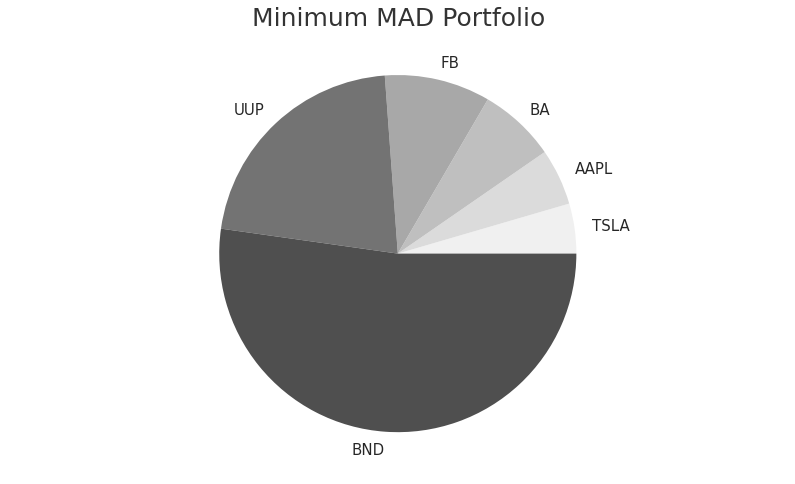

In [976]:
plt.axis("equal")
plt.title("Minimum MAD Portfolio", fontsize=25, color="#333333")
pie_wedge_collection = plt.pie(weights.abs().order(),
                               labels=[security.symbol for security in weights.abs().order().index],
                               colors=["#F0F0F0",
                                       "#DBDBDB",
                                       "#BFBFBF",
                                       "#A8A8A8",
                                       "#737373",
                                       "#4F4F4F"])

for pie_wedge in pie_wedge_collection[0]:
    pie_wedge.set_edgecolor('none')
for text in pie_wedge_collection[1]:
    text.set_fontsize(15)


#### Questions? | jhall@quantopian.com

Don't have a Quantopian account? 
[Join now and start coding!](https://www.quantopian.com/users/sign_up)